## Chapter 12
# Numpy 고급
---

In [1]:
%pylab inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


### csv 파일 읽기
- 파이썬 기본 라이브러리 사용

In [2]:
f = open('iris.csv')
for i in range(5):
    s = f.readline()
    print('### %d ==> [%s]' % (i,s)) # 개행문자 포함됨
f.close()

### 0 ==> ["sepal.length","sepal.width","petal.length","petal.width","variety"
]
### 1 ==> [5.1,3.5,1.4,.2,"Setosa"
]
### 2 ==> [4.9,3,1.4,.2,"Setosa"
]
### 3 ==> [4.7,3.2,1.3,.2,"Setosa"
]
### 4 ==> [4.6,3.1,1.5,.2,"Setosa"
]


In [3]:
f = open('iris.csv')

line = f.readline()
header = line.strip().split(',')
header = [s.strip('"') for s in header]

data = []
mapper = {'"Setosa"': 0, '"Versicolor"': 1, '"Virginica"': 2}

for line in f:
    l = line.strip().split(',') # 모든 요소가 문자열로 저장됨
    for i in range(4): l[i] = float(l[i]) # 숫자를 실수형으로 변환
    l[-1] = mapper[l[-1]] # 레이블을 숫자로 변환 (따옴표 주의)
    data.append(l)

f.close()

print(header)
print(data[:5])

raw_data = np.array(data)
X = raw_data[:,:-1]
y = raw_data[:,-1]

print(X.shape, y.shape)
display(X[:5], y[:5])

['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety']
[[5.1, 3.5, 1.4, 0.2, 0], [4.9, 3.0, 1.4, 0.2, 0], [4.7, 3.2, 1.3, 0.2, 0], [4.6, 3.1, 1.5, 0.2, 0], [5.0, 3.6, 1.4, 0.2, 0]]
(150, 4) (150,)


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

array([0., 0., 0., 0., 0.])

- numpy 의 loadtxt() 함수 사용

In [4]:
help(numpy.loadtxt)

Help on function loadtxt in module numpy.lib.npyio:

loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding='bytes')
    Load data from a text file.
    
    Each row in the text file must have the same number of values.
    
    Parameters
    ----------
    fname : file, str, or pathlib.Path
        File, filename, or generator to read.  If the filename extension is
        ``.gz`` or ``.bz2``, the file is first decompressed. Note that
        generators should return byte strings for Python 3k.
    dtype : data-type, optional
        Data-type of the resulting array; default: float.  If this is a
        structured data-type, the resulting array will be 1-dimensional, and
        each row will be interpreted as an element of the array.  In this
        case, the number of columns used must match the number of fields in
        the data-type.
    comments : str or sequence of str, optional
       

In [5]:
# data = np.loadtxt('iris.csv', delimiter=',') # error!
# data = np.loadtxt('iris.csv', delimiter=',', skiprows=1) # error!
data = np.loadtxt('iris.csv', delimiter=',', skiprows=1, usecols=[0,1,2,3])

display(data.shape, data[:5])

(150, 4)

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [6]:
mapper = {'"Setosa"': 0, '"Versicolor"': 1, '"Virginica"': 2}

# data = np.loadtxt('iris.csv', delimiter=',', skiprows=1, encoding='utf-8',
#                  converters={4: lambda s: mapper[s]})

data = np.loadtxt('iris.csv', delimiter=',', skiprows=1,
                 converters={4: lambda s: mapper[s.decode()]})

display(data.shape, data[:5])

(150, 5)

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ]])

In [7]:
mapper = {'우주':1, '서울':2}

data = np.loadtxt('둘리와친구들.txt', delimiter=',', skiprows=1, usecols=[1,2,3], encoding='ms949',
                  converters={2: lambda s: mapper[s] if s in mapper else 0})

# data = np.loadtxt('둘리와친구들_utf-8.txt', delimiter=',', skiprows=1, usecols=[1,2,3], encoding='utf-8',
#                   converters={2: lambda s: mapper[s] if s in mapper else 0})

display(data.shape, data[:5])

(3, 3)

array([[18.,  1.,  8.],
       [35.,  2.,  9.],
       [18.,  0.,  7.]])

><**주의**\>
- 윈도우의 메모장에서 한글을 입력하고 저장하면 'ms949' 인코딩으로 저장된다.<br>이를 'utf-8' 로 저장하려면 '파일 > 다른이름으로저장' 으로 들어가서 하단의 인코딩을 'utf-8' 로 바꾸어 저장한다.
- loadtxt() 함수는 기본적으로 실수형으로 데이터를 변환한다.<br>그리고 만일 비어 있는 데이터가 있다면 에러가 발생한다. 이런 경우 converters 옵션으로 해결해 주어야 한다. (converters = {3: lambda s: float(s.strip() or 0)})

In [8]:
a = np.arange(6).reshape(3,2)
b = np.arange(12).reshape(3,4)

np.concatenate([a,b],axis=1)
np.hstack([a,b])
np.c_[a,b]

array([[ 0,  1,  0,  1,  2,  3],
       [ 2,  3,  4,  5,  6,  7],
       [ 4,  5,  8,  9, 10, 11]])

In [9]:
a = np.arange(6).reshape(2,3)
b = np.arange(12).reshape(4,3)

np.concatenate([a,b],axis=0)
np.vstack([a,b])
np.r_[a,b]

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [10]:
a = np.arange(15).reshape(3,5)
first,second = np.split(a,[4],axis=1) # reference

second[0,0]=-1
display(first,second,a)

array([[ 0,  1,  2,  3],
       [ 5,  6,  7,  8],
       [10, 11, 12, 13]])

array([[-1],
       [ 9],
       [14]])

array([[ 0,  1,  2,  3, -1],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [11]:
a = np.arange(3)
b = np.arange(6).reshape(3,2)

np.c_[a,a] # (3,) => (3,1) 로 변환
np.r_[a,a]
np.c_[a,b]

array([[0, 0, 1],
       [1, 2, 3],
       [2, 4, 5]])

In [12]:
a = np.arange(3)
b = np.arange(6).reshape(3,2)

np.tile(a,[2,3])
np.tile(b,[2,3])
np.tile(b,2)

array([[0, 1, 0, 1],
       [2, 3, 2, 3],
       [4, 5, 4, 5]])

### 브로드캐스팅 (broadcasting)

- 두 어레이의 shape 에서, 각 차원의 값이 같거나 1이어야 한다. ((3,1,2) <=> (3,3,1))
- 1차원 벡터와 같이 차원이 적은 경우, 앞부분이 1로 채워진 것으로 생각한다. ((3,1,2) <=> (2,), (3,1,2) <=> (1,2))
- [Numpy 메뉴얼](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html) 참조

In [13]:
a = np.arange(12).reshape(4,3)
display(a)

display(a + [1,2,3]) # (4,3) <=> (3,)
display(a + [[1],[2],[3],[4]]) # (4,3) <=> (3,1)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

array([[ 1,  3,  5],
       [ 4,  6,  8],
       [ 7,  9, 11],
       [10, 12, 14]])

array([[ 1,  2,  3],
       [ 5,  6,  7],
       [ 9, 10, 11],
       [13, 14, 15]])

In [14]:
a = np.array([1,2,3])
a + a.reshape(-1,1) # (3,) <=> (3,1)

array([[2, 3, 4],
       [3, 4, 5],
       [4, 5, 6]])

In [15]:
a = np.arange(12).reshape(4,3)
display(a)

col_mean = a.mean(axis=0)
display(col_mean, a - col_mean)

row_mean = a.mean(axis=1)
display(row_mean, a - row_mean.reshape(-1,1))

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

array([4.5, 5.5, 6.5])

array([[-4.5, -4.5, -4.5],
       [-1.5, -1.5, -1.5],
       [ 1.5,  1.5,  1.5],
       [ 4.5,  4.5,  4.5]])

array([ 1.,  4.,  7., 10.])

array([[-1.,  0.,  1.],
       [-1.,  0.,  1.],
       [-1.,  0.,  1.],
       [-1.,  0.,  1.]])

In [16]:
display(a)

### normalization ###
n1 = (a - a.mean(axis=0))/a.std(axis=0)
n2 = (a - a.min(axis=0))/(a.max(axis=0)-a.min(axis=0))
display(n1,n2)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

array([[-1.34164079, -1.34164079, -1.34164079],
       [-0.4472136 , -0.4472136 , -0.4472136 ],
       [ 0.4472136 ,  0.4472136 ,  0.4472136 ],
       [ 1.34164079,  1.34164079,  1.34164079]])

array([[0.        , 0.        , 0.        ],
       [0.33333333, 0.33333333, 0.33333333],
       [0.66666667, 0.66666667, 0.66666667],
       [1.        , 1.        , 1.        ]])

### 사용자 정의 함수 적용

In [17]:
a = np.random.randn(5,5)
display(a)

# my_func = lambda x: -1 if x<-1 else (1 if x>1 else x)
my_func = lambda x: x if -1<x<1 else 1*sign(x)
np.vectorize(my_func)(a)

array([[ 0.09120686,  1.67964114,  0.12717386, -1.14309552,  0.65102371],
       [ 0.58109859,  1.07983203, -0.03576764, -0.47741818,  0.20987536],
       [-1.70903358, -1.66470828,  1.18760066,  0.71259412,  0.67652631],
       [ 0.4540236 ,  1.61556084, -0.55401344,  0.29803583,  0.22898387],
       [ 1.89529363,  0.4474404 ,  0.5470761 , -1.74073814, -0.10860362]])

array([[ 0.09120686,  1.        ,  0.12717386, -1.        ,  0.65102371],
       [ 0.58109859,  1.        , -0.03576764, -0.47741818,  0.20987536],
       [-1.        , -1.        ,  1.        ,  0.71259412,  0.67652631],
       [ 0.4540236 ,  1.        , -0.55401344,  0.29803583,  0.22898387],
       [ 1.        ,  0.4474404 ,  0.5470761 , -1.        , -0.10860362]])

### 정렬

In [18]:
a = np.random.randint(10,size=[10,4]); a

array([[3, 2, 3, 1],
       [3, 2, 0, 5],
       [6, 9, 5, 5],
       [1, 1, 3, 7],
       [0, 3, 8, 3],
       [6, 6, 8, 8],
       [0, 5, 7, 2],
       [4, 5, 4, 4],
       [6, 3, 2, 5],
       [2, 7, 0, 1]])

In [19]:
np.sort(a) # a.sort()
np.sort(a, axis=0) # a.sort(axis=0)

array([[0, 1, 0, 1],
       [0, 2, 0, 1],
       [1, 2, 2, 2],
       [2, 3, 3, 3],
       [3, 3, 3, 4],
       [3, 5, 4, 5],
       [4, 5, 5, 5],
       [6, 6, 7, 5],
       [6, 7, 8, 7],
       [6, 9, 8, 8]])

In [20]:
marker = a[:,0].argsort()
display(marker)

a[:,0][marker]

array([4, 6, 3, 9, 0, 1, 7, 2, 5, 8], dtype=int32)

array([0, 0, 1, 2, 3, 3, 4, 6, 6, 6])

In [21]:
sorted_a = a[marker]
sorted_a

array([[0, 3, 8, 3],
       [0, 5, 7, 2],
       [1, 1, 3, 7],
       [2, 7, 0, 1],
       [3, 2, 3, 1],
       [3, 2, 0, 5],
       [4, 5, 4, 4],
       [6, 9, 5, 5],
       [6, 6, 8, 8],
       [6, 3, 2, 5]])

In [22]:
marker2 = np.lexsort([a[:,1],a[:,0]]) # sort by first col_0, then col_1
display(marker2)

a[marker2]

array([4, 6, 3, 9, 0, 1, 7, 8, 5, 2], dtype=int32)

array([[0, 3, 8, 3],
       [0, 5, 7, 2],
       [1, 1, 3, 7],
       [2, 7, 0, 1],
       [3, 2, 3, 1],
       [3, 2, 0, 5],
       [4, 5, 4, 4],
       [6, 3, 2, 5],
       [6, 6, 8, 8],
       [6, 9, 5, 5]])

In [23]:
a[marker2][::-1]

array([[6, 9, 5, 5],
       [6, 6, 8, 8],
       [6, 3, 2, 5],
       [4, 5, 4, 4],
       [3, 2, 0, 5],
       [3, 2, 3, 1],
       [2, 7, 0, 1],
       [1, 1, 3, 7],
       [0, 5, 7, 2],
       [0, 3, 8, 3]])

In [24]:
a = np.random.randint(101,size=20)
display(a)

b = np.digitize(a,[0,60,70,80,90,101]) # 구간값(1부터)를 할당한다 => 가/양/미/우/수
display(b)

names = {1: '가', 2: '양', 3: '미', 4: '우', 5: '수'}
np.vectorize(lambda x: names[x])(b)

array([99, 94, 37, 21, 79, 80, 27, 81, 60, 93, 43, 69, 47, 87, 60, 27, 10,
       62, 15, 59])

array([5, 5, 1, 1, 3, 4, 1, 4, 2, 5, 1, 2, 1, 4, 2, 1, 1, 2, 1, 1],
      dtype=int32)

array(['수', '수', '가', '가', '미', '우', '가', '우', '양', '수', '가', '양', '가',
       '우', '양', '가', '가', '양', '가', '가'], dtype='<U1')

### Iris 데이터 정렬

In [25]:
mapper = {'"Setosa"': 0, '"Versicolor"': 1, '"Virginica"': 2}

iris = np.loadtxt('iris.csv', delimiter=',', skiprows=1,
                 converters={4: lambda s: mapper[s.decode()]})

display(iris.shape, iris[:5])

(150, 5)

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ]])

In [26]:
iris[iris[:,0].argsort()][:10]

array([[4.3, 3. , 1.1, 0.1, 0. ],
       [4.4, 3.2, 1.3, 0.2, 0. ],
       [4.4, 3. , 1.3, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.5, 2.3, 1.3, 0.3, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [4.6, 3.2, 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ]])

In [27]:
marker = np.lexsort([iris[:,2],iris[:,0]])
display(marker)

iris2 = iris[marker]

array([ 13,  38,  42,   8,  41,  22,   6,  47,   3,   2,  29,  12,  45,
        11,  30,  24,   1,  37,   9,  34,  57, 106,  35,  40,   4,  49,
         7,  25,  26,  43,  93,  60,   0,  17,  19,  21,  39,  46,  23,
        44,  98,  28,  27,  32,  59,  48,  16,  10,  31,   5,  20,  84,
        36,  33,  81,  80,  53,  89,  90,  64,  69,  88,  94,  66, 121,
        15,  18,  79,  99,  95,  96,  55, 113,  14,  82,  92,  67, 101,
       114, 142,  61,  70, 149,  62,  78,  85, 138, 119,  83,  71,  91,
        63,  73, 127, 134,  97,  68, 126, 148,  87,  56,  72, 123, 146,
       133, 103, 136, 100,  74,  51, 111, 115, 137, 128, 132,  54, 110,
       147, 116, 104,  75,  58,  65,  86,  77, 145, 140, 124, 144, 108,
        76, 112, 143,  52, 141, 139, 120,  50, 102, 129, 125, 109, 107,
       130, 105, 135, 117, 122, 118, 131], dtype=int32)

(4.0, 8.0, 0.0, 2.0)

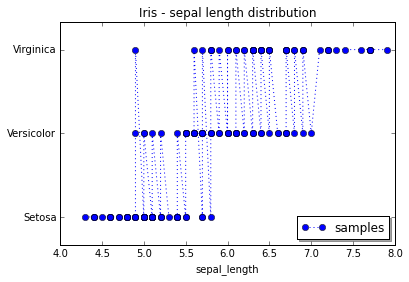

In [28]:
plt.plot(iris2[:,0],iris2[:,4],'bo:')
plt.yticks([0,1,2],['Setosa','Versicolor','Virginica'])
plt.xlabel('sepal_length')
plt.title('Iris - sepal length distribution')
plt.legend(['samples'],loc='lower right',shadow=True)
plt.axis('equal')

In [3]:
import numpy as np

a = np.random.randn(3,5)
a

array([[-1.18506936,  0.18764858, -1.45255522,  0.26352696,  0.51427116],
       [ 0.69392088, -0.45458511,  0.39986535,  1.79145352,  0.71422576],
       [-0.23419188,  0.6220057 , -0.68827699,  1.27383735,  0.12031232]])

In [5]:
np.random.shuffle(a); a

array([[-0.23419188,  0.6220057 , -0.68827699,  1.27383735,  0.12031232],
       [ 0.69392088, -0.45458511,  0.39986535,  1.79145352,  0.71422576],
       [-1.18506936,  0.18764858, -1.45255522,  0.26352696,  0.51427116]])